In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (20,10)

# Importing data
# The dataset contains the data on daily sales, average daily prices and costs from 01/01/2017to 31/12/2018. 

spc = pd.read_csv('Sales_price_costs.csv', delimiter=",")
spc['Date'] = pd.to_datetime(spc['Date'],format='%d/%m/%Y') # Date to to datetime
spc['Month']=spc['Date'].dt.month
spc = spc.set_index('Date')   # Date as index
spc.head()

,Sales,Price,Costs,Sale,Week,Week1,Week2,Week3,Week4,Week5,...,Week51,Week52,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Month
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,138,1542.5,1024.2,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2017-01-02,134,1545.3,1024.2,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2017-01-03,131,1521.2,1024.2,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2017-01-04,136,1535.2,1024.2,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2017-01-05,125,1547.8,1024.2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
spc[['Sales', 'Price', 'Costs']].describe()   #summary statistics

# As it can be seen from the table, the average daily sales during the observed period
# were approximately 153 units. The mean price was 1507 and the mean costs were 1004 conventional units, 
# implying the margin of 503, on average. It is noteworthy that the mean and the median are almost the same 
# for each variable, hence, their distribution is likely to be close to normal.

,Sales,Price,Costs
count,730.000000,730.000000,730.000000
mean,153.410959,1506.603014,1004.227137
std,17.160451,28.122096,14.682909
min,109.000000,1420.800000,961.470000
25%,142.000000,1487.925000,996.310000
50%,153.000000,1508.300000,1004.300000
75%,164.000000,1527.750000,1014.900000
max,222.000000,1571.300000,1029.400000


# 1. Estimate the linear regression of sales depending on price using OLS x_t = μ + α*p_t + v_t, where v_t is a white noise error sequence.

In [38]:
# The analysis aims to identify optimal price which maximizes the profit. Firstly, we assume that prices are exogenous in 
# the demand equation x_t=μ+α*p_t+v_t.  In other words, we assume that prices are not affected by x_t.  This could be possible 
# if the company changes a price with a frequency lower than daily.


# OLS model
X = spc['Sales']
P = spc['Price']
model = sm.OLS(X,sm.add_constant(P),missing='drop')
resultsOLS = model.fit()    # resultsOLS contains all the estimation information
print(resultsOLS.summary()) # prints detailed version of regression results

# Table below presents the OLS regression results of the demand function x_t=μ+α*p_t+v_t, where x_t is the 
# variable for sales and p_t is the price. According to the value of F-statistic (P <0.01), the model, in general, 
# is statistically significant. The coefficient of price variable is statistically significant (p <0.01). The model seems to 
# be correctly specified.


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1272.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          6.61e-162
Time:                        12:04:48   Log-Likelihood:                -2741.6
No. Observations:                 730   AIC:                             5487.
Df Residuals:                     728   BIC:                             5496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        886.5730     20.562     43.118      0.0

# 2. Plot the demand function

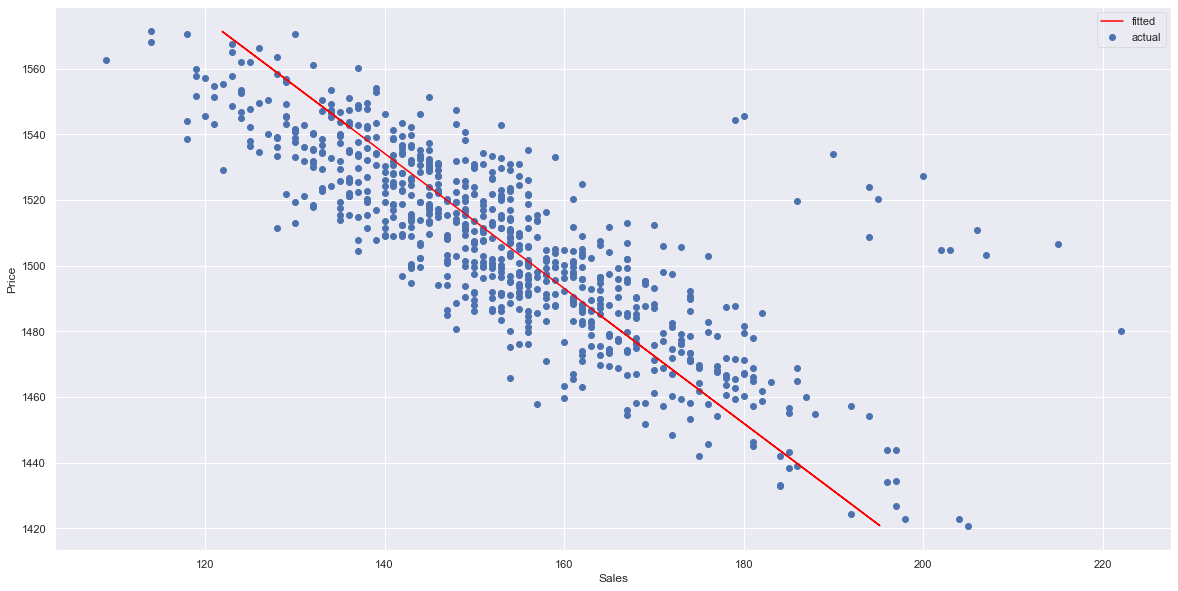

In [39]:
# However, figure below shows that there are several outliers, which can be distinguished visually. 
# The values of sales and  prices of these unusual observations are higher. These outliers were recorded on 
# some days in July - primarily on 7-13th of July, for both 2017 and 2018. Unfortunately, we do not have enough information
# about the dataset, particularly about the country and product,to make plausible assumptions about the origin of the outliers.
# The source of these outliers is not straightforward. Potentially, such a sharp increase in sales could be induced by the
# period of holidays, advertisement campaign or simply an increase in demand for the good (e.g., the increase in sales of
# umbrellas during the rainy weather). Nevertheless, even we do not know much about them, the model could be significantly  
# improved by controlling for the outliers further.


b = resultsOLS.params # save coefficients
X_hat = resultsOLS.predict()  # predict
plt.scatter(X, P, label = 'actual') # scatter plot
plt.plot(X_hat, P, color='red', label ='fitted') # predicted line
plt.xlabel('Sales')
plt.ylabel('Price')
plt.legend(framealpha = 0.5)

# 3. Elasticity

In [40]:
# The demand function, that we obtained in the previous section, is conventionally visualized using quantity (or, in our case, 
# sales) on horizontal axis and price on vertical axis.  This function, also known as the inverse demand function, 
# is depicted in the figure above. The price elasticity of demand shows the percentage change in quantity demanded in response 
# to a one percent change in price.  The formula for coefficient is the following: elasticity = dX/dP*P/X = a*P/X. 

# Hence, the price elasticity is not fixed across observations and varies with a price-to-sales ratio.  Moreover,  the 
# coefficients are negative in compliance with the law of demand.  In our example, the average coefficient of price 
# elasticity is -4.82 and ranges from -6.27 to -3.54.  Therefore, the 1% increase in the price of the given commodity is
# followed by 3-to-5% drop in demand, meaning that the demand is elastic. 

spc['elasticity'] = b['Price']*P/X_hat  # calculating elasticity
spc['elasticity'] # varies with sales/price

Date
2017-01-01   -5.521685
2017-01-02   -5.587715
2017-01-03   -5.059651
2017-01-04   -5.355602
2017-01-05   -5.647810
                ...   
2018-12-27   -4.016763
2018-12-28   -3.757379
2018-12-29   -4.135552
2018-12-30   -4.316902
2018-12-31   -4.411663
Name: elasticity, Length: 730, dtype: float64

# 3. Optimal price (assuming c_t=c_t+1)

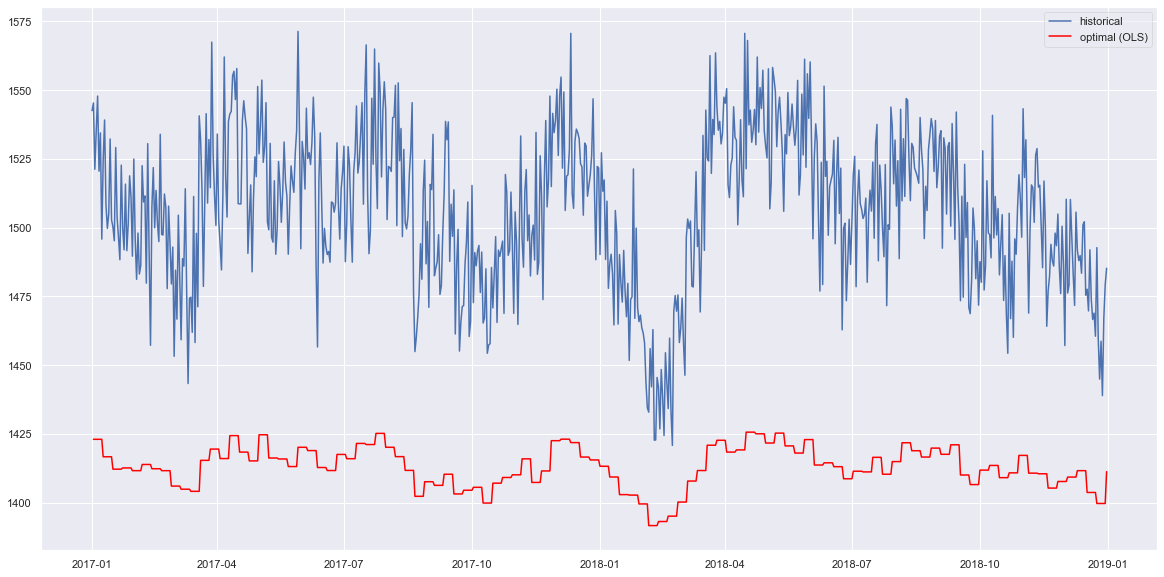

In [41]:
# By maximizing the profit function π_t=x_t(p_t−c_t), where x_t=μ+α*x_t+v_t, and assuming exogenous costs the optimal one-step
# ahead price p_t+1 is given by the following formula: p_t+1=c_t+1/2-μ/2a.

# Figure below illustrates historical and optimal prices assuming that c_t+1=c_t.  It can be clearly seen that generally the 
# level of predicted optimal prices is quite lower than the level of historical ones, however the optimal prices almost 
# perfectly capture the dynamic of the actual ones.

spc['lagCosts'] = spc['Costs'].shift(1) #previous value of Costs
spc['optPrice'] = spc['lagCosts']/2-b['const']/(2*b['Price'])  #optimal Price according to the formula above
fig,ax1 = plt.subplots()   #plotting historical and optimal Price
plt.plot(spc.index, spc['Price'], label ='historical')
plt.plot(spc.index, spc['optPrice'], color = 'red', label ='optimal (OLS)')
plt.legend(framealpha = 0.5)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))



# 4. Optimal profit

In [42]:
# The actual and optimal profits are 56 009 597 and 72 835 654 conventional units, respectively.The company lost 16 826 057 
# units of profit because the price was not set optimally.

profit_hist = sum((spc['Sales']*(spc['Price']-spc['Costs']))[1:]) # historical profit
profit_hist

56009597.43000002

In [43]:
X_opt = b['const']+b['Price']*spc['optPrice']
profit_opt = sum((X_opt*(spc['Price']-spc['Costs']))[1:]) # optimal profit
profit_opt

72835653.77638389

In [44]:
profit_opt-profit_hist  # the difference between optimal and historical profit

16826056.34638387

# 5. IV estimation

# 5.a 1-st stage

In [45]:
# Further, we assume that managers of our company could adjust the price level during the day based on sales, i.e. if the 
# sales are lower than the daily average, they will lower the price and visa versa. In this way, demand is affected by the
# price, and the price could be affected by demand. Hence, OLS estimators are not unbiased and consistent anymore. To solve
# the endogeneity problem we will use the Instrumental Variable approach, the procedure of which is the following: instead of 
# endogenous regressor (price is our case) use the predicted values from the regression of this endogenous regressor on some
# exogenous variable (instrument), which is strongly correlated with the endogenous variable and is not correlated with the 
# variable of interest. The first stage is estimating the regression of price on costs: p_t=μ_p+β*c_t+e_t. The results are
# presented below. According to the value of F-statistic (P <0.01),the model, in general, is statistically significant.  
# The coefficient of Costs variable is statistically significant (p <0.01), hence, the instrument seems to be relevant.


C = spc['Costs']
model2 = sm.OLS(P,sm.add_constant(C),missing='drop')  # 1st stage of IV
resultsOLS2 = model2.fit()                     # fitting
print(resultsOLS2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1352.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          4.33e-168
Time:                        12:05:12   Log-Likelihood:                -3087.9
No. Observations:                 730   AIC:                             6180.
Df Residuals:                     728   BIC:                             6189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.0016     42.182     -1.043      0.2

In [46]:
# obtain the fitted price phat_t
spc['predicted'] = resultsOLS2.predict()

# 5.b 2-nd stage

In [47]:
# The second stage of IV approach is estimating the model of demand on fitted values of price obtained from the 1-st stage: 
# x_t=μ+α*phat_t+v_t, the results of estimation are presented in table below.  The model is statistically significant, the
# coefficient of the fitted price is significant at 1% level of significance.The estimation results of OLS and IV approach are 
# very similar, however, assuming that theprice is endogenous we got a slightly lower coefficient. The choice between these two
# approaches should be made based on the ”rules” - whether it is possible to adjust prices during a day or not.


PredP = spc['predicted'] #predicted values phat_t
model3 = sm.OLS(X,sm.add_constant(PredP),missing='drop')  #2nd stage of IV estimation x_t=μ+α*phat_t+v_t
resultsOLS3 = model3.fit() 
print(resultsOLS3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     312.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.22e-58
Time:                        12:05:18   Log-Likelihood:                -2980.2
No. Observations:                 730   AIC:                             5964.
Df Residuals:                     728   BIC:                             5974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        778.0189     35.365     21.999      0.0

# 5.c Optimal price (IV)

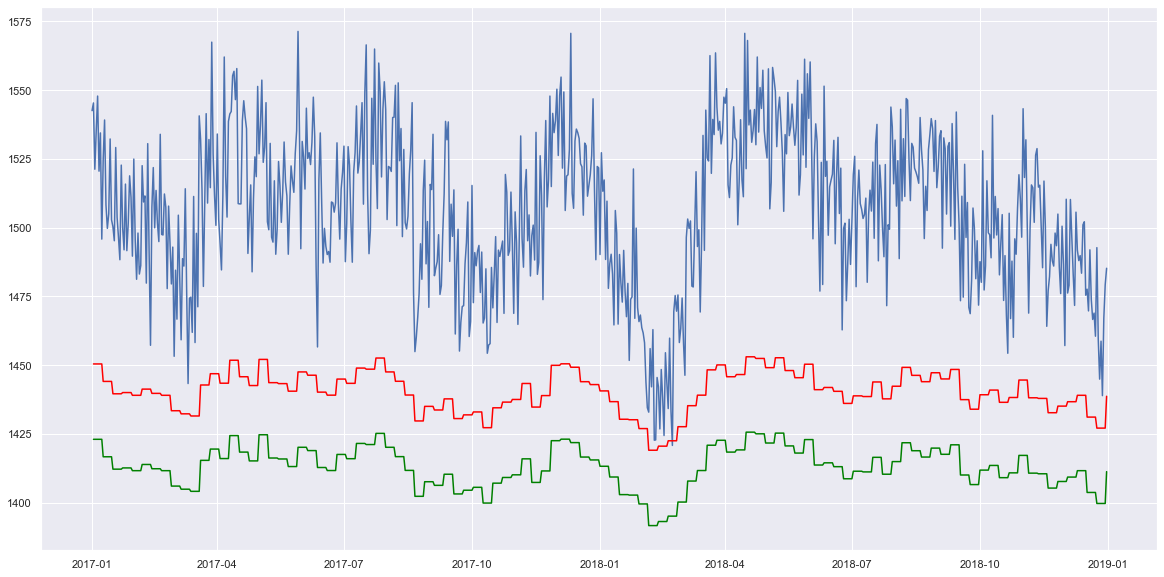

In [48]:
# Figure below illustrates historical prices compared with the optimal prices obtained from OLS and IV estimation approach.   
# Assuming that price is endogenous we got generally lower optimal prices compared with the historical and larger compared
# with optimal prices from the OLS. Nevertheless, both optimal from OLS and optimal from IV prices capture the changes in 
# historical prices. 


b_iv = resultsOLS3.params #getting coefficients
spc['optPrice_iv'] = spc['lagCosts']/2-b_iv['const']/(2*b_iv['predicted']) #calculating optimal prices
plt.plot(spc.index, spc['Price'])  #plotting
plt.plot(spc.index, spc['optPrice'], color = 'green')
plt.plot(spc.index, spc['optPrice_iv'], color = 'red')

# 6. Including dummies for weeks and day of a week

In [51]:
# Further,  we  added  dummy  variables  for  days  of  a  week  (Tuesday  to  Sunday,  Monday  isa  baseline)  and 
# months  (February  to  December,  January  is  a  baseline).   The  results  of  the 2-nd stage IV regression are presented 
# in the table below.  The model is jointly significant,  however, F-statistic fell dramatically (from 312.0 to 23.32).  Almost the 
# whole set of dummies is insignificant,  however,  we  can  observe  positive  and  statistically  significant  coefficient 
# of  July  (when the unusual high prices and sales were recorded) and of Sunday compared with Monday.  The results of 
# estimation including week dummies is presented in code, it is interesting that again we observe positive and significant 
# coefficients for 27-28th weeks, when the outliers were recorded.


# including dummy variables for the week and the day of the week in the regression

spc['Tuesday'] = spc['Tuesday'].replace('T',1)   #correct a typo in the data

W = spc[['Week{}'.format(i) for i in range(2,53)]]
D = spc[['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']] # using the first week and Monday as a baseline

R1 = pd.concat([C, W, D], axis = 1)
R1 = sm.add_constant(R1)

model4 = sm.OLS(P,R1.astype(float),missing='drop')  # 1st stage
resultsOLS4 = model4.fit()
spc['predicted_d'] = resultsOLS4.predict()
PredP_d = spc['predicted_d']

R2 = pd.concat([PredP_d, W, D], axis = 1)
R2 = sm.add_constant(R2)

model5 = sm.OLS(X,R2.astype(float),missing='drop')
resultsOLS5 = model5.fit() #  2nd stage
print(resultsOLS5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     11.23
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.15e-66
Time:                        12:05:39   Log-Likelihood:                -2862.8
No. Observations:                 730   AIC:                             5844.
Df Residuals:                     671   BIC:                             6115.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         818.4855     51.819     15.795      

# 7. Including dummies for month and day of a week

In [52]:
# using month dummies instead of week dummies (results almost the same)
M = pd.get_dummies(spc['Month'],drop_first = True) # getting dummies

V1 = pd.concat([C, M, D], axis = 1)
V1 = sm.add_constant(V1)

model6 = sm.OLS(P,V1.astype(float),missing='drop')  # 1st stage
resultsOLS6 = model6.fit()
spc['predicted_d'] = resultsOLS6.predict()
PredP_d = spc['predicted_d']

V2 = pd.concat([PredP_d, M, D], axis = 1)
V2 = sm.add_constant(V2)

model7 = sm.OLS(X,V2.astype(float),missing='drop')
resultsOLS7 = model7.fit() # 2nd stage
print(resultsOLS7.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     23.32
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.06e-60
Time:                        12:05:47   Log-Likelihood:                -2941.1
No. Observations:                 730   AIC:                             5920.
Df Residuals:                     711   BIC:                             6007.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         805.4841     44.266     18.197      

# 8. Optimal price (with dummies)

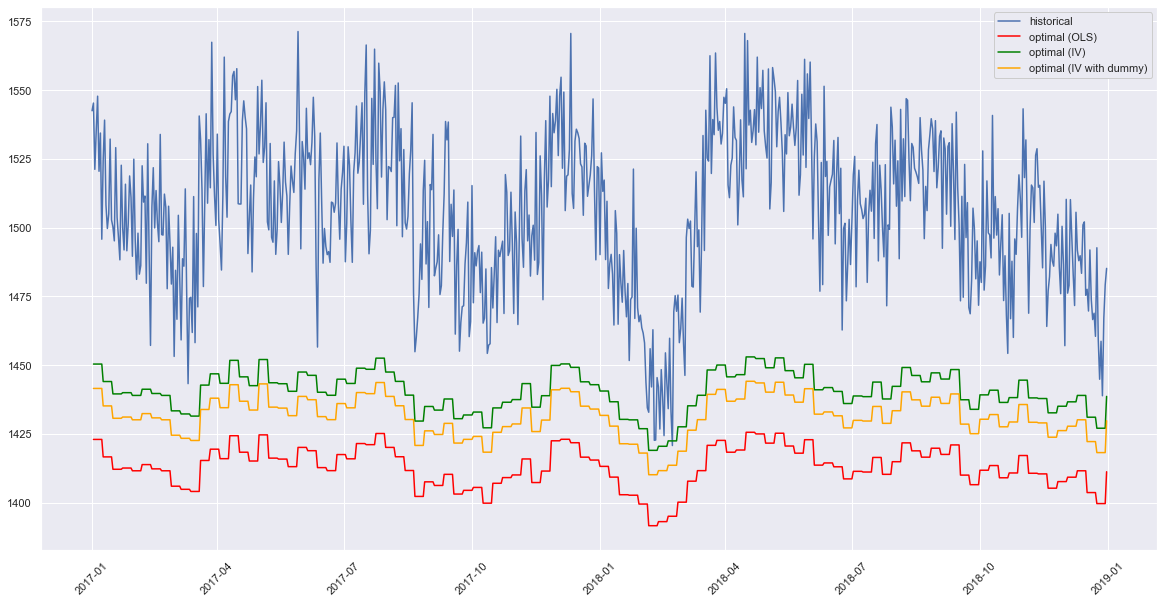

In [53]:
# Figure below illustrates historical prices compared with optimal ones in the case of OLS, IV, and IV with dummies estimation.
# Including dummies for month and day a week we got optimal prices between optimal prices from OLS and simple IV estimation.


b_iv_dummy = resultsOLS7.params   # obtain coefficients
spc['optPrice_iv_dummy'] = spc['lagCosts']/2-b_iv_dummy['const']/(2*b_iv_dummy['predicted_d']) # calculating optimal price
plt.plot(spc.index, spc['Price'], label='historical') # plot historical price
plt.plot(spc.index, spc['optPrice'], color = 'red', label='optimal (OLS)') # plot optimal OLS price
plt.plot(spc.index, spc['optPrice_iv'], color = 'green', label='optimal (IV)') # plot optimal IV price
plt.plot(spc.index, spc['optPrice_iv_dummy'], color = 'orange', label='optimal (IV with dummy)') # plot optimal IV with dummies
# price
plt.legend(framealpha = 1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
_ = plt.xticks(rotation=45)

In [ ]:
# Providing that we do not know a lot about the origin of the dataset, we would prefer the last models - IV estimation with
# the inclusion of dummies - month and day of a week or weekand day of a week (they both work for us).  Despite the fact, that 
# the general significance of the model fell noticeably, still we have a statistically significant model with a set of dummies
# that could capture the unusual values of prices and sales. 